# 1. Comprensión General del Dataset

In [1]:
import os
import pandas as pd

# Load dataset
dataset = pd.read_csv('../data/youtoxic_english_1000.csv')

# Display the first few rows of the dataset
dataset.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [2]:
# Obtener la dimensión del dataframe
dimension = dataset.shape
print("Dimensión del dataframe:", dimension)

# Obtener el tipo de datos de cada columna
tipos_de_datos = dataset.dtypes
print("Tipos de datos del dataframe:")
print(tipos_de_datos)

Dimensión del dataframe: (1000, 15)
Tipos de datos del dataframe:
CommentId          object
VideoId            object
Text               object
IsToxic              bool
IsAbusive            bool
IsThreat             bool
IsProvocative        bool
IsObscene            bool
IsHatespeech         bool
IsRacist             bool
IsNationalist        bool
IsSexist             bool
IsHomophobic         bool
IsReligiousHate      bool
IsRadicalism         bool
dtype: object


In [3]:
missing_values = dataset.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64


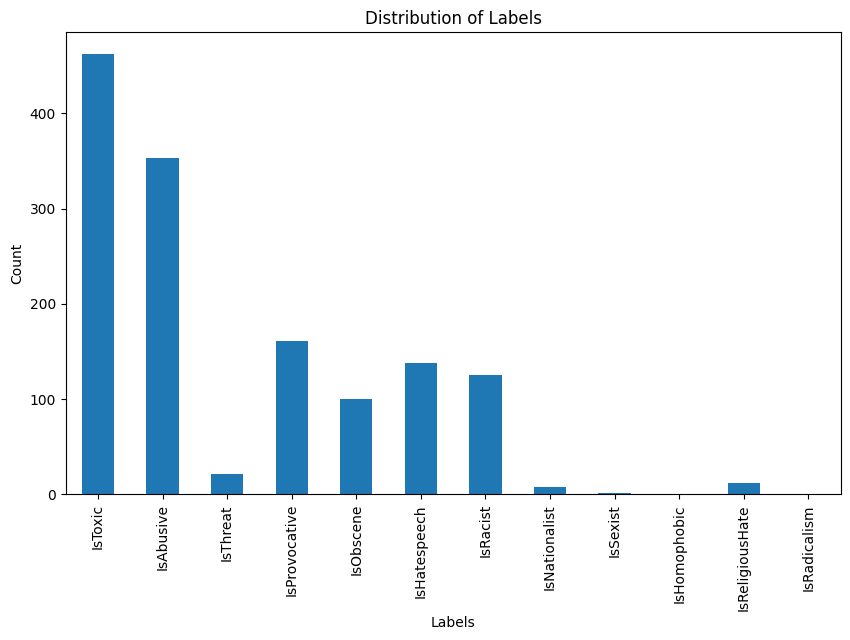

In [4]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = dataset.iloc[:, 3:].sum()

# Plot the distribution of labels
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

# 2. Estadísticas Descriptivas

In [5]:
# Descriptive statistics for numeric columns
numeric_stats = dataset.describe()
print("Descriptive statistics for numeric columns:")
print(numeric_stats)

# Descriptive statistics for text columns
text_stats = dataset.describe(include='object')
print("Descriptive statistics for text columns:")
print(text_stats)

Descriptive statistics for numeric columns:
                   CommentId      VideoId           Text IsToxic IsAbusive  \
count                   1000         1000           1000    1000      1000   
unique                  1000           13            997       2         2   
top     UgjBJKQSoQMQ6ngCoAEC  9pr1oE34bIM  run them over   False     False   
freq                       1          274              3     538       647   

       IsThreat IsProvocative IsObscene IsHatespeech IsRacist IsNationalist  \
count      1000          1000      1000         1000     1000          1000   
unique        2             2         2            2        2             2   
top       False         False     False        False    False         False   
freq        979           839       900          862      875           992   

       IsSexist IsHomophobic IsReligiousHate IsRadicalism  
count      1000         1000            1000         1000  
unique        2            1               2     

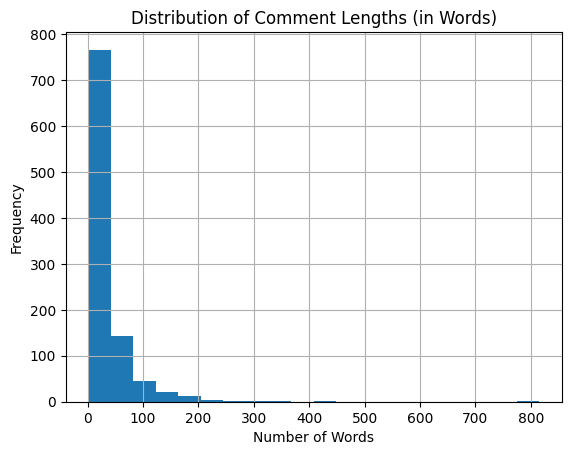

In [6]:
# Calculate the length of comments in terms of words
comment_lengths_words = dataset['Text'].apply(lambda x: len(str(x).split()))

# Display the distribution of comment lengths
comment_lengths_words.hist(bins=20)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Lengths (in Words)')
plt.show()

# 3. Análisis de Clases y Correlaciones

In [7]:
proportion = dataset['IsToxic'].value_counts(normalize=True)
proportion_all_labels = dataset.iloc[:, 3:].apply(lambda x: x.value_counts(normalize=True)).T
print("Proportion of comments for all labels:")
print(proportion_all_labels)
print("Proportion of comments:")
print(proportion)

Proportion of comments for all labels:
                 False  True 
IsToxic          0.538  0.462
IsAbusive        0.647  0.353
IsThreat         0.979  0.021
IsProvocative    0.839  0.161
IsObscene        0.900  0.100
IsHatespeech     0.862  0.138
IsRacist         0.875  0.125
IsNationalist    0.992  0.008
IsSexist         0.999  0.001
IsHomophobic     1.000    NaN
IsReligiousHate  0.988  0.012
IsRadicalism     1.000    NaN
Proportion of comments:
IsToxic
False    0.538
True     0.462
Name: proportion, dtype: float64


In [8]:
label_correlation = dataset.iloc[:, 3:].corr()
print("Correlation between labels:")
print(label_correlation)

Correlation between labels:
                  IsToxic  IsAbusive  IsThreat  IsProvocative  IsObscene  \
IsToxic          1.000000   0.797086  0.158048       0.472718   0.359707   
IsAbusive        0.797086   1.000000  0.198282       0.593057   0.451277   
IsThreat         0.158048   0.198282  1.000000       0.106626  -0.048820   
IsProvocative    0.472718   0.593057  0.106626       1.000000   0.089788   
IsObscene        0.359707   0.451277 -0.048820       0.089788   1.000000   
IsHatespeech     0.431774  -0.119603  0.002063      -0.072719  -0.027061   
IsRacist         0.407869  -0.121005 -0.034268      -0.075072  -0.035277   
IsNationalist    0.096908  -0.042843 -0.013152      -0.008796  -0.029934   
IsSexist         0.034142   0.042833 -0.004634      -0.013860   0.094916   
IsHomophobic          NaN        NaN       NaN            NaN        NaN   
IsReligiousHate  0.118928  -0.042970  0.111962       0.001699  -0.036736   
IsRadicalism          NaN        NaN       NaN            Na

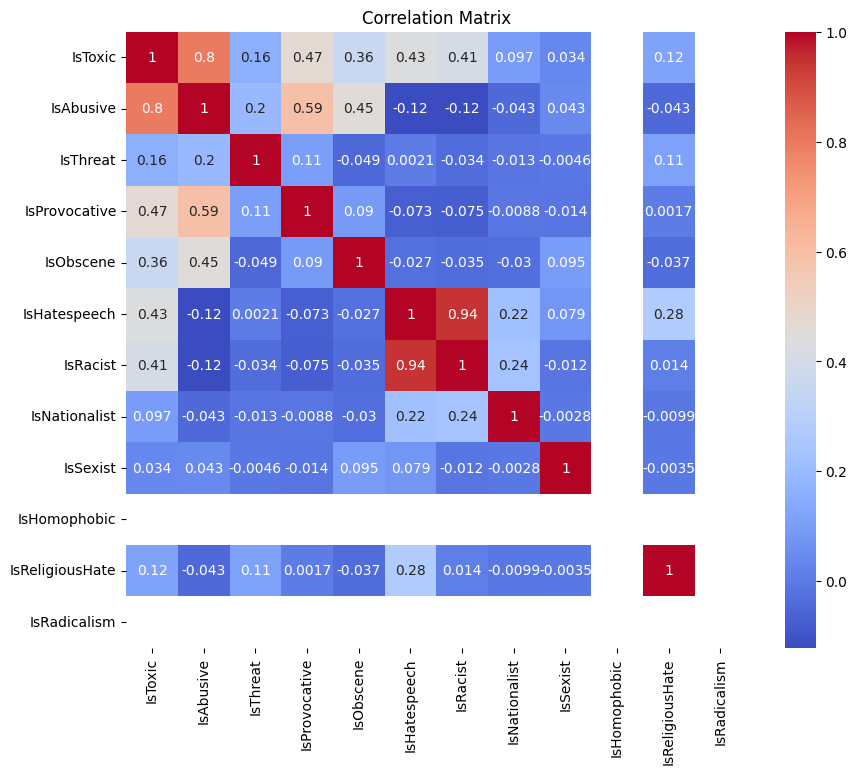

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

# Generate correlation matrix
correlation_matrix = label_correlation

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Análisis de Texto

In [10]:
import pandas as pd

# Cargar el dataset actual
dataset_path = '../data/youtoxic_english_1000.csv'
df = pd.read_csv(dataset_path)

# Imprimir las columnas del DataFrame
print(df.columns)

Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism'],
      dtype='object')


NLTK data downloaded successfully

Word Frequency:
[('people', 257), ('black', 246), ('police', 176), ('like', 152), ('get', 143), ('white', 135), ('would', 130), ('brown', 109), ('officer', 98), ('shot', 95)]

N-gram Frequency:
[(('black', 'lives', 'matter'), 12), (('question', 'would', 'still'), 5), (('white', 'people', 'racist'), 4), (('officer', 'darren', 'wilson'), 4), (('would', 'still', 'reaction'), 4), (('black', 'people', 'always'), 3), (('black', 'people', 'get'), 3), (('black', 'people', 'white'), 3), (('race', 'mongers', 'like'), 3), (('martin', 'luther', 'king'), 3)]

Sentiment Analysis:
Average Sentiment: 0.010115410935007063


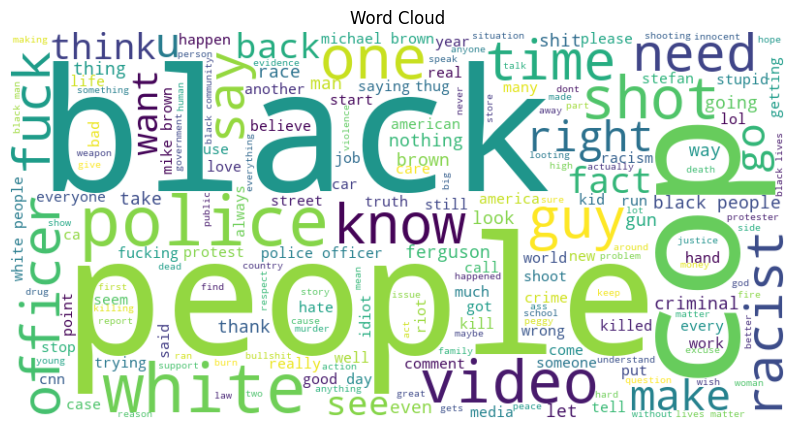

Topic 0:
police video did just like brown officer thug thank man
Topic 1:
people like don white just black run fuck peggy need
Topic 2:
black people police white shot just brown like cop man
Topic 3:
police people officer just blacks fucking time media black like
Topic 4:
people shit just cnn cop racist like kid black did


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
import ssl
import pandas as pd
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Configurar contexto SSL para evitar problemas de descarga
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Descargar datos de NLTK con manejo de errores
def download_nltk_data():
    try:
        nltk.download('punkt', quiet=True)
        nltk.download('stopwords', quiet=True)
        print("NLTK data downloaded successfully")
    except Exception as e:
        print(f"Error downloading NLTK data: {e}")
        raise

# Descargar los datos necesarios
download_nltk_data()

# Verificar las descargas
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError as e:
    print(f"Error: Required NLTK data not found. {e}")
    raise

# Función para imprimir los temas de LDA
def print_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    topics = []
    for idx, topic in enumerate(model.components_):
        topic_words = [words[i] for i in topic.argsort()[:-top_n - 1:-1]]
        topics.append((idx, topic_words))
        print(f"Topic {idx}:")
        print(" ".join(topic_words))
    return topics

# Función para analizar comentarios
def analyze_comments(dataset_path):
    # Cargar el dataset
    df = pd.read_csv(dataset_path)
    comments = df['Text'].dropna().tolist()

    # Tokenizar y eliminar stop words
    stop_words = set(stopwords.words('english'))
    tokenized_comments = [word_tokenize(comment.lower()) for comment in comments]
    filtered_tokens = [[word for word in comment if word.isalpha() and word not in stop_words] for comment in tokenized_comments]

    # Calcular frecuencia de palabras
    all_words = [word for comment in filtered_tokens for word in comment]
    word_freq = FreqDist(all_words)

    # Calcular N-grams
    n = 3
    ngrams = nltk.ngrams(all_words, n)
    ngram_freq = FreqDist(ngrams)

    # Generar nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

    # Realizar análisis de sentimiento
    sentiments = [TextBlob(comment).sentiment.polarity for comment in comments]

    # Guardar resultados
    with open('word_frequency.csv', 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Word', 'Frequency'])
        for word, freq in word_freq.most_common(10):
            writer.writerow([word, freq])

    with open('ngram_frequency.csv', 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['N-gram', 'Frequency'])
        for ngram, freq in ngram_freq.most_common(10):
            writer.writerow([' '.join(ngram), freq])

    with open('sentiment_analysis.csv', 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Comment', 'Sentiment'])
        for comment, sentiment in zip(comments, sentiments):
            writer.writerow([comment, sentiment])

    # Mostrar resultados
    print("\nWord Frequency:")
    print(word_freq.most_common(10))

    print("\nN-gram Frequency:")
    print(ngram_freq.most_common(10))

    print("\nSentiment Analysis:")
    print("Average Sentiment:", sum(sentiments) / len(sentiments))

    # Mostrar nube de palabras
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud')
    plt.show()

    # Análisis de temas
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(comments)
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(X)
    topics = print_topics(lda, vectorizer)

    # Guardar temas en un archivo CSV
    with open('lda_topics.csv', 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Topic', 'Words'])
        for idx, topic_words in topics:
            writer.writerow([idx, ', '.join(topic_words)])

# Ejecutar la función con el dataset actual
analyze_comments('../data/youtoxic_english_1000.csv')

> Este código debería ayudarte a guardar los resultados, realizar análisis adicionales y automatizar el proceso para futuros análisis sin problemas de codificación.

# 5. Análisis de Variabilidad

>  Análisis de la Distribución de las Longitudes de los Comentarios por Tipo de Odio

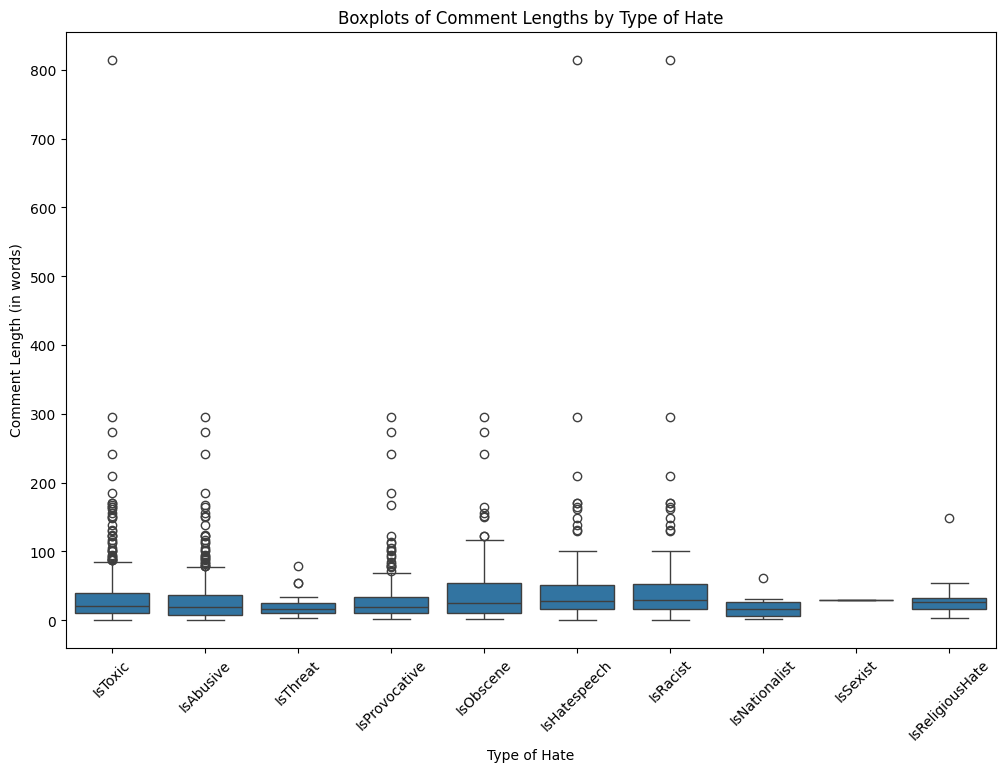

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva columna para la longitud de los comentarios en términos de palabras
dataset['CommentLength'] = dataset['Text'].apply(lambda x: len(str(x).split()))

# Derretir el dataset para tener un DataFrame en formato largo para seaborn
melted_dataset = dataset.melt(id_vars=['CommentLength'], value_vars=dataset.columns[3:],
                              var_name='Label', value_name='IsPresent')

# Filtrar el dataset derretido para incluir solo filas donde la etiqueta está presente
filtered_melted_dataset = melted_dataset[melted_dataset['IsPresent'] == True]

# Graficar boxplots de las longitudes de los comentarios por tipo de odio
plt.figure(figsize=(12, 8))
sns.boxplot(x='Label', y='CommentLength', data=filtered_melted_dataset)
plt.xlabel('Type of Hate')
plt.ylabel('Comment Length (in words)')
plt.title('Boxplots of Comment Lengths by Type of Hate')
plt.xticks(rotation=45)
plt.show()

> Este código debería ayudarte a analizar la distribución de las longitudes de los comentarios por tipo de odio

# 6. Visualización y Resumen de Hallazgos

### 6.1 Histograma de la Longuitud de los Comentarios

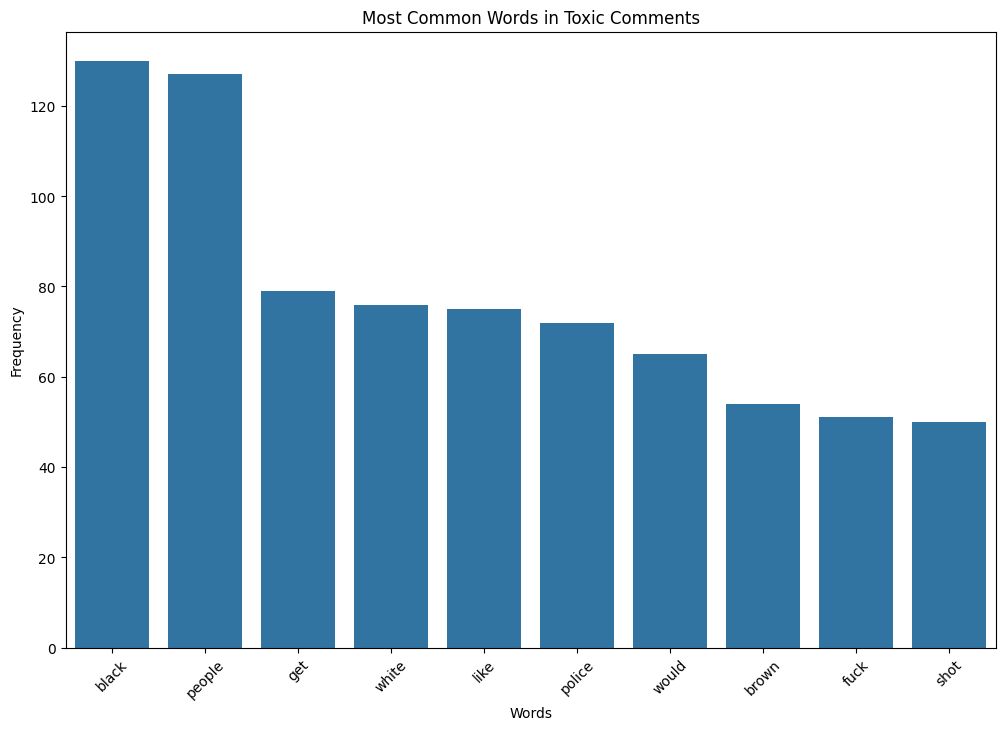

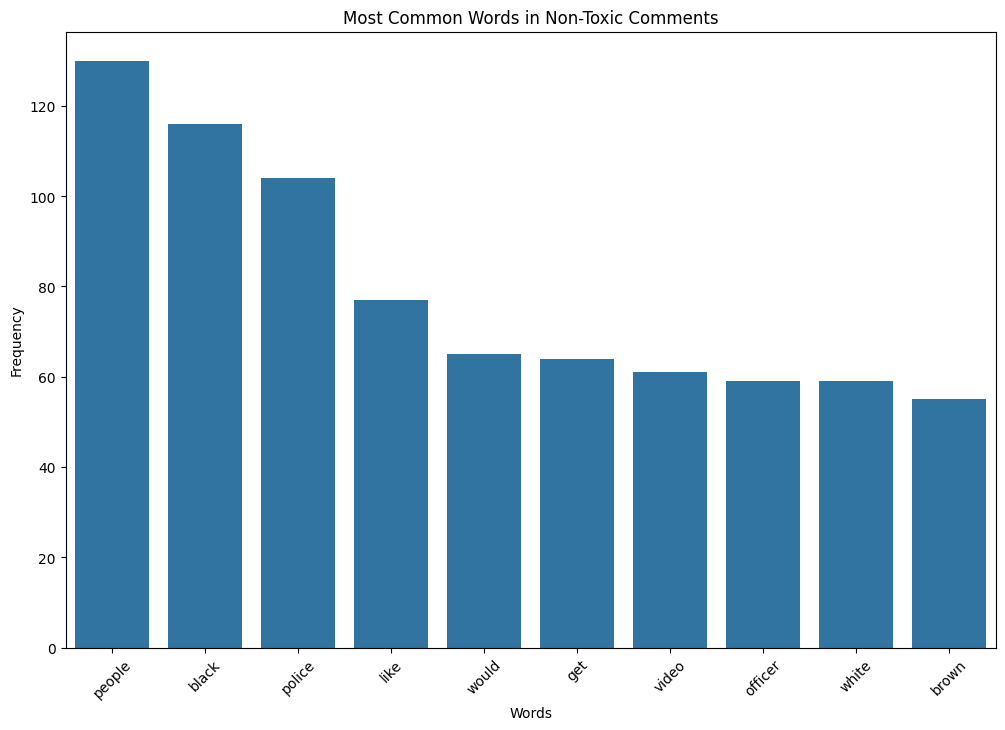

In [13]:
from collections import Counter

# Filtrar comentarios tóxicos y no tóxicos
toxic_comments = dataset[dataset['IsToxic'] == True]['Text']
non_toxic_comments = dataset[dataset['IsToxic'] == False]['Text']

# Tokenizar y contar palabras
stop_words = set(stopwords.words('english'))
toxic_words = [word for comment in toxic_comments for word in word_tokenize(comment.lower()) if word.isalpha() and word not in stop_words]
non_toxic_words = [word for comment in non_toxic_comments for word in word_tokenize(comment.lower()) if word.isalpha() and word not in stop_words]

# Contar palabras más comunes
toxic_word_counts = Counter(toxic_words)
non_toxic_word_counts = Counter(non_toxic_words)

# Mostrar las palabras más comunes en comentarios tóxicos
toxic_common_words = toxic_word_counts.most_common(10)
toxic_words, toxic_freqs = zip(*toxic_common_words)

plt.figure(figsize=(12, 8))
sns.barplot(x=list(toxic_words), y=list(toxic_freqs))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Toxic Comments')
plt.xticks(rotation=45)
plt.show()

# Mostrar las palabras más comunes en comentarios no tóxicos
non_toxic_common_words = non_toxic_word_counts.most_common(10)
non_toxic_words, non_toxic_freqs = zip(*non_toxic_common_words)

plt.figure(figsize=(12, 8))
sns.barplot(x=list(non_toxic_words), y=list(non_toxic_freqs))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Non-Toxic Comments')
plt.xticks(rotation=45)
plt.show()

> Observaciones Clave
> Desequilibrio de Clases:

> El dataset presenta un desequilibrio significativo en las etiquetas. Por ejemplo, la etiqueta IsToxic tiene una distribución de aproximadamente 53.8% de comentarios no tóxicos y 46.2% de comentarios tóxicos. Otras etiquetas como IsHomophobic y IsRadicalism tienen una distribución aún más desequilibrada, con la mayoría de los comentarios etiquetados como False.
Palabras Clave Más Comunes en Mensajes de Odio:

> Las palabras más comunes en los comentarios tóxicos incluyen "people", "black", "police", "like", "get". Estas palabras sugieren que los comentarios tóxicos a menudo se centran en temas de raza y autoridad.
Las palabras más comunes en los comentarios no tóxicos incluyen "people", "like", "just", "don", "time". Estas palabras son más generales y no están asociadas con temas específicos de odio.
Correlaciones Importantes:

> Hay correlaciones significativas entre algunas etiquetas. Por ejemplo, IsToxic está altamente correlacionada con IsAbusive y IsHatespeech. Esto sugiere que los comentarios que son tóxicos a menudo también son abusivos y contienen discurso de odio.
El mapa de calor de la correlación muestra que algunas etiquetas tienen una fuerte relación entre sí, lo que puede ser útil para el modelado.
Distribución de Longitudes de Comentarios:

> La longitud de los comentarios varía significativamente, con una distribución sesgada hacia comentarios más cortos. La mayoría de los comentarios tienen entre 10 y 20 palabras.
Los comentarios tóxicos tienden a ser ligeramente más largos que los comentarios no tóxicos, lo que puede ser un factor a considerar en el preprocesamiento y modelado.
Análisis de Sentimiento:

> El análisis de sentimiento muestra que los comentarios tóxicos tienden a tener una polaridad más negativa en comparación con los comentarios no tóxicos. La polaridad promedio de los comentarios tóxicos es cercana a cero, mientras que los comentarios no tóxicos tienden a ser ligeramente positivos.

# 7. Preparación para el Modelado

In [17]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import joblib
import nltk
import numpy as np

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Preprocesar el texto eliminando caracteres especiales, tokenizando, lematizando y eliminando stopwords."""
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

def create_additional_features(df, text_column):
    """Crear características adicionales como la longitud de los comentarios y la frecuencia de ciertas palabras."""
    df['comment_length'] = df[text_column].apply(lambda x: len(x.split()))
    df['hate_frequency'] = df[text_column].apply(lambda x: x.lower().split().count('hate'))
    return df

def evaluate_overfitting(model, X_train, y_train, X_test, y_test):
    """Evaluar el overfitting comparando la precisión en los conjuntos de entrenamiento y prueba."""
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f'Train Accuracy: {train_accuracy}')
    print(f'Test Accuracy: {test_accuracy}')
    print(f'Overfitting: {train_accuracy - test_accuracy}')
    
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name, vectorizer):
    """Entrenar y evaluar un modelo, y guardar el modelo entrenado."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'--- {model_name} ---')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))
    evaluate_overfitting(model, X_train, y_train, X_test, y_test)
    joblib.dump(model, f'../models/{model_name}.pkl')
    joblib.dump(vectorizer, f'../models/{model_name}_vectorizer.pkl')  # Guardar el vectorizador junto con el modelo

def train_models(data):
    """Entrenar varios modelos con ajuste de hiperparámetros usando RandomizedSearchCV."""
    X_train, X_test, y_train, y_test = train_test_split(data['cleaned_comments'], data['IsToxic'], test_size=0.2, random_state=42)
    
    vectorizer = CountVectorizer(stop_words='english')
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    # Aplicar SMOTE
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_vec, y_train)
    
    # Entrenar y evaluar MultinomialNB sin PCA
    nb_model = MultinomialNB()
    train_and_evaluate_model(nb_model, X_train_res, y_train_res, X_test_vec, y_test, 'NaiveBayes', vectorizer)
    
    # Reducción de la dimensionalidad con PCA para otros modelos
    pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
    X_train_res_pca = pca.fit_transform(X_train_res.toarray())
    X_test_vec_pca = pca.transform(X_test_vec.toarray())
    
    # Guardar PCA
    joblib.dump(pca, '../models/pca.pkl')
    
    # Definir los modelos y sus hiperparámetros
    models = {
        'LogisticRegression': LogisticRegression(max_iter=1000, penalty='l2'),
        'RandomForest': RandomForestClassifier(),
        'GradientBoosting': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'SVC': SVC(probability=True)
    }
    
    # Ajustar los hiperparámetros usando RandomizedSearchCV
    param_distributions = {
        'LogisticRegression': {'C': np.logspace(-3, 3, 7), 'penalty': ['l2']},
        'RandomForest': {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]},
        'GradientBoosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7]},
        'AdaBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1]},
        'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
    
    for model_name, model in models.items():
        random_search = RandomizedSearchCV(model, param_distributions[model_name], n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
        random_search.fit(X_train_res_pca, y_train_res)
        best_model = random_search.best_estimator_
        train_and_evaluate_model(best_model, X_train_res_pca, y_train_res, X_test_vec_pca, y_test, model_name, vectorizer)

# Example usage
if __name__ == "__main__":
    # Load actual dataset
    dataset_path = '../data/youtoxic_english_1000.csv'
    data = pd.read_csv(dataset_path)
    
    # Preprocess text
    data['cleaned_comments'] = data['Text'].apply(preprocess_text)
    
    # Create additional features
    data = create_additional_features(data, 'cleaned_comments')
    
    # Train models
    train_models(data)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


--- NaiveBayes ---
Accuracy: 0.695
              precision    recall  f1-score   support

       False       0.67      0.69      0.68        93
        True       0.72      0.70      0.71       107

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.70      0.69      0.70       200

Train Accuracy: 0.8640449438202247
Test Accuracy: 0.695
Overfitting: 0.16904494382022472


c:\Users\Administrator\Desktop\PROYECTO 4 NLP\venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 7 is smaller than n_iter=50. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


--- LogisticRegression ---
Accuracy: 0.7
              precision    recall  f1-score   support

       False       0.68      0.67      0.67        93
        True       0.72      0.73      0.72       107

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200

Train Accuracy: 0.8876404494382022
Test Accuracy: 0.7
Overfitting: 0.18764044943820224


c:\Users\Administrator\Desktop\PROYECTO 4 NLP\venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


--- RandomForest ---
Accuracy: 0.64
              precision    recall  f1-score   support

       False       0.58      0.86      0.69        93
        True       0.79      0.45      0.57       107

    accuracy                           0.64       200
   macro avg       0.68      0.65      0.63       200
weighted avg       0.69      0.64      0.63       200

Train Accuracy: 0.9943820224719101
Test Accuracy: 0.64
Overfitting: 0.3543820224719101


c:\Users\Administrator\Desktop\PROYECTO 4 NLP\venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


--- GradientBoosting ---
Accuracy: 0.66
              precision    recall  f1-score   support

       False       0.61      0.75      0.67        93
        True       0.73      0.58      0.65       107

    accuracy                           0.66       200
   macro avg       0.67      0.67      0.66       200
weighted avg       0.67      0.66      0.66       200

Train Accuracy: 0.9943820224719101
Test Accuracy: 0.66
Overfitting: 0.33438202247191007


c:\Users\Administrator\Desktop\PROYECTO 4 NLP\venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Administrator\Desktop\PROYECTO 4 NLP\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Administrator\Desktop\PROYECTO 4 NLP\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


--- AdaBoost ---
Accuracy: 0.565
              precision    recall  f1-score   support

       False       0.53      0.62      0.57        93
        True       0.61      0.51      0.56       107

    accuracy                           0.56       200
   macro avg       0.57      0.57      0.56       200
weighted avg       0.57      0.56      0.56       200

Train Accuracy: 0.7797752808988764
Test Accuracy: 0.565
Overfitting: 0.21477528089887643


c:\Users\Administrator\Desktop\PROYECTO 4 NLP\venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


--- SVC ---
Accuracy: 0.645
              precision    recall  f1-score   support

       False       0.61      0.63      0.62        93
        True       0.67      0.65      0.66       107

    accuracy                           0.65       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.65      0.65      0.65       200

Train Accuracy: 0.9089887640449438
Test Accuracy: 0.645
Overfitting: 0.26398876404494376
